In [103]:
# Assignment-2

## Student Name : Riya Patil
## Professor : Nik Bear Brown

### Q1. (10 marks) 
**Problem Statement:** Design a metro network optimization system that constructs a metro network graph based on given travel time data between stations, finds the shortest route between any two stations, and recommends potential network enhancements by identifying critical stations where additional tracks or connections could improve travel times.

**1. Constructing the Metro Network Graph:**

**Input Format:**
- A list of stations, represented as strings.
- A list of tuples, where each tuple consists of two stations (start and end) and the travel time between them.

**Output Format:**
- A directed graph representing the metro network.

**Sample Inputs:**
- Stations: ["Station A", "Station B", "Station C"]
- Travel Times: [("Station A", "Station B", 5), ("Station B", "Station C", 7)]

**Sample Outputs:**
- A graph with nodes "Station A", "Station B", and "Station C". "Station A" has a directed edge to "Station B" with weight 5, and "Station B" has a directed edge to "Station C" with weight 7.


**2. Finding the Shortest Route:**

**Input Format:**
- A directed graph representing the metro network.
- Two stations: start station and destination station.

**Output Format:**
- A list of stations representing the shortest route from the start station to the destination station.

**Sample Inputs:**
- Graph from the previous example.
- Start Station: "Station A", Destination Station: "Station C"

**Sample Outputs:**
- ["Station A", "Station B", "Station C"]


**3. Network Enhancement Recommendations:**

**Input Format:**
- A directed graph representing the metro network.

**Output Format:**
- A list of stations that are potential candidates for network enhancements, along with the recommended connections to other stations.

**Sample Inputs:**
- Graph from the first example.

**Sample Outputs:**
- ["Station A": ["Connection to Station C"], "Station C": ["Connection to Station A"]]

**Constraints:**
1. The number of stations in the metro network will not exceed 10^5.
2. Travel time between any two stations is a positive integer and does not exceed 300 minutes.
3. There will be no multiple direct tracks between the same pair of stations.
4. All station names are unique.
5. While recommending network enhancements, suggest a maximum of two new connections for any station.


**Solution:**
1.	To construct the initial metro network graph, we can represent it as an adjacency matrix or an adjacency list. The nodes correspond to the stations, and the directed edges represent the tracks between them, with weights representing travel times. This can be achieved using the following pseudocode:

Function constructGraph(stations, travelTimes):
    graph = empty dictionary
    for each station in stations:
        graph[station] = empty list

    for start, end, time in travelTimes:
        graph[start].append((end, time))

    return graph


2.	To find the shortest route between two stations, we can use Dijkstra's algorithm, which is well-suited for weighted directed graphs. This pseudocode efficiently computes the shortest path from a source station to all other stations in the network.
Function shortestRoute(graph, start, end):
    distances = dictionary with infinite distance for each station except start which has distance 0
    previous = dictionary to store the previous station in the shortest path
    unvisited = list of all stations

    while unvisited is not empty:
        currentStation = station from unvisited with the smallest distance
        if currentStation is end:
            break
        for neighbor, time in graph[currentStation]:
            newDist = distances[currentStation] + time
            if newDist < distances[neighbor]:
                distances[neighbor] = newDist
                previous[neighbor] = currentStation

        remove currentStation from unvisited

    path = [end]
    while end in previous.keys():
        path.append(previous[end])
        end = previous[end]

    return reversed path


In [104]:
import heapq

def shortestRoute(graph, start, end):
    distances = {station: float('infinity') for station in graph}
    distances[start] = 0
    previous = {}
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_station = heapq.heappop(priority_queue)

        if current_distance > distances[current_station]:
            continue

        for neighbor, time in graph[current_station]:
            distance = current_distance + time
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_station
                heapq.heappush(priority_queue, (distance, neighbor))

    path, current_station = [], end
    while current_station in previous:
        path.append(current_station)
        current_station = previous[current_station]
    path.append(start)

    return path[::-1]

graph = {
    "StationA": [("StationB", 5), ("StationC", 10)],
    "StationB": [("StationC", 2)],
    "StationC": []
}


route = shortestRoute(graph, "StationA", "StationC")
print(route)  


['StationA', 'StationB', 'StationC']


3.	For network optimization, we can consider various factors like traffic patterns, passenger load, and potential new connections. A simple heuristic could be to identify stations with high passenger volume and propose additional tracks or connections to nearby stations with high demand. This would involve a more comprehensive analysis of the travel time data and could be implemented based on specific criteria defined by the city authorities.

Function recommendEnhancements(graph):
    // Initialize distance matrix with infinite distances and 0 for diagonal
    // ... (Skipping initialization for brevity)
    
    // Apply Floyd-Warshall algorithm
    // ... (Skipping steps for brevity)

    recommendations = empty dictionary
    for each stationA in graph:
        for each stationB in graph:
            if stationB not in graph[stationA] and stationA not in graph[stationB]:
                if calculated distance between stationA and stationB > threshold:
                    recommendations[stationA].append(stationB)

    return recommendations

In [105]:
def recommendEnhancements(graph):
    stations = list(graph.keys())
    n = len(stations)
    distance_matrix = [[float('infinity')]*n for _ in range(n)]
    
    for i in range(n):
        distance_matrix[i][i] = 0

    for i, stationA in enumerate(stations):
        for stationB, time in graph[stationA]:
            j = stations.index(stationB)
            distance_matrix[i][j] = time

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if distance_matrix[i][k] + distance_matrix[k][j] < distance_matrix[i][j]:
                    distance_matrix[i][j] = distance_matrix[i][k] + distance_matrix[k][j]

    threshold = 10  # Set a threshold for recommending new connections
    recommendations = {}
    for i in range(n):
        for j in range(n):
            if i != j and distance_matrix[i][j] > threshold:
                if stations[i] not in recommendations:
                    recommendations[stations[i]] = []
                recommendations[stations[i]].append(stations[j])

    return recommendations

graph = {
    "StationA": [("StationB", 5), ("StationC", 10)],
    "StationB": [("StationC", 2)],
    "StationC": []
}

enhancements = recommendEnhancements(graph)
print(enhancements)


{'StationB': ['StationA'], 'StationC': ['StationA', 'StationB']}


**Reflection:**  
In my quest to optimize a city's metro routes, I sought guidance from ChatGPT. Though the initial graph-based representation seemed simple, the complexities of Dijkstra's and Floyd-Warshall algorithms presented challenges. ChatGPT played a pivotal role, translating these algorithms into Python code. While the first attempts weren't without hitches, the tool's step-by-step assistance was invaluable. This experience deepened my understanding of graph algorithms, highlighted the significance of iterative problem-solving, and showcased how tools like ChatGPT can adeptly bridge theory and real-world application.

### Q2. (10 marks)  
**Problem Statement:** In a large-scale digital library, users read e-books in sequences. Each user has a pattern or preference, which is evident from the sequence in which they read the books. The library wishes to understand these patterns to recommend books better, keep users engaged, and optimize its inventory.  

The library maintains a sequence \( S \) of \( n \) books read by a user. Among these, certain sequences (patterns) of reading are of high interest to the library, as they are associated with high user engagement. Given a primary sequence \( S \) of books read by a user, your task is to:

1. Determine the frequency of each book in \( S \).
2. For a given set of \( k \) patterns \( P_1, P_2, ... P_k \), detect which patterns are present in \( S \). A pattern is considered present if the books in the pattern appear in the same order in \( S \), though not necessarily consecutively.
3. Identify any "super patterns", i.e., patterns that contain other smaller patterns within them.
4. For each detected pattern, find the average gap between the books in \( S \). This helps in understanding how spread out each pattern is.
5. The library also has a set \( B \) of "bonus books" which, if read immediately after a pattern, lead to higher user satisfaction. Determine how many times a bonus book was read immediately after each pattern.

**Input Format:**  
- A primary sequence \( S \) of \( n \) books.
- \( k \) pattern sequences \( P_1, P_2, ... P_k \) where each \( P_i \) is a sequence of \( m_i \) books.
- A set \( B \) of bonus books.

**Output Format:**  
- A list of patterns detected in \( S \).
- Frequency of each book in \( S \).
- For each detected pattern, the average gap between the books.
- Count of times a bonus book from \( B \) was read immediately after each pattern.

**Constraints:**  
- \( 1 \leq m_i \leq n \leq 10^5 \) for all \( i \) where \( 1 \leq i \leq k \)
- \( 1 \leq k \leq 100 \)
- Each book title in the sequences will be a string of at most 100 characters.
- The bonus book set \( B \) contains at most 50 unique books.

**Solution:**  
#### 1. Determine the frequency of each book in \( S \):
**Pseudocode:**  

function computeFrequency(S):
    initialize empty dictionary freqMap
    for each book in S:
        if book is in freqMap:
            increment freqMap[book]
        else:
            freqMap[book] = 1
    return freqMap

#### 2. Detect patterns in \( S \):  
**Pseudocode:**  

function detectPatterns(S, Patterns):
    initialize empty list detectedPatterns
    for each pattern P in Patterns:
        if isSubsequence(S, P):
            append P to detectedPatterns
    return detectedPatterns

function isSubsequence(S, P):
    initialize pointers i and j to 0
    while i < length(S) and j < length(P):
        if S[i] == P[j]:
            increment j
        increment i
    return j == length(P)


#### 3. Identify "super patterns":  
**Pseudocode:**  

function findSuperPatterns(Patterns):
    initialize empty list superPatterns
    for each pattern P1 in Patterns:
        for each pattern P2 in Patterns:
            if P1 != P2 and isSubsequence(P1, P2):
                append P1 to superPatterns
                break
    return superPatterns


#### 4. For each detected pattern, find the average gap between the books:  
**Pseudocode:**  

function computeAverageGap(S, Pattern):
    initialize list positions
    initialize pointers i and j to 0
    while i < length(S):
        if S[i] == Pattern[j]:
            append i to positions
            increment j
            if j == length(Pattern):
                break
        increment i
    compute gaps between consecutive elements in positions
    return average of gaps


#### 5. Count of times a bonus book from \( B \) was read immediately after each pattern:  
**Pseudocode:**  

function countBonusAfterPattern(S, Pattern, B):
    initialize count to 0
    initialize pointer i to 0
    while i < length(S) - 1:
        if isSubsequenceStartingAt(S, Pattern, i):
            i += length(Pattern)
            if S[i] in B:
                increment count
        else:
            increment i
    return count

function isSubsequenceStartingAt(S, Pattern, start):
    initialize pointer j to 0
    for i from start to length(S) - 1:
        if S[i] == Pattern[j]:
            increment j
            if j == length(Pattern):
                return true
    return false

**Reflection:**  
Designing algorithms to analyze reading patterns in a digital library was a challenging yet insightful task. While ChatGPT greatly assisted in generating algorithmic solutions for tasks like computing book frequencies and detecting patterns, maintaining the problem's spirit without excessive complexity was a balancing act. Striking a practical balance was crucial, and this experience underscored the significance of problem design in algorithmic challenges. It reinforced the idea that creating well-structured problems, grounded in real-world scenarios, is essential for effective algorithm design. This exercise has deepened my understanding of the importance of problem design in the realm of algorithms and will guide my future algorithmic endeavors.

### Q3. (10 marks)  
**Problem Statement:** You are given a set of items, each with a weight and a value. Your goal is to select a subset of items with the maximum combined value, such that the total weight of the selected items does not exceed the capacity of a given knapsack. Use dynamic programming to determine the maximum value obtainable and the subset of items that achieve this value.
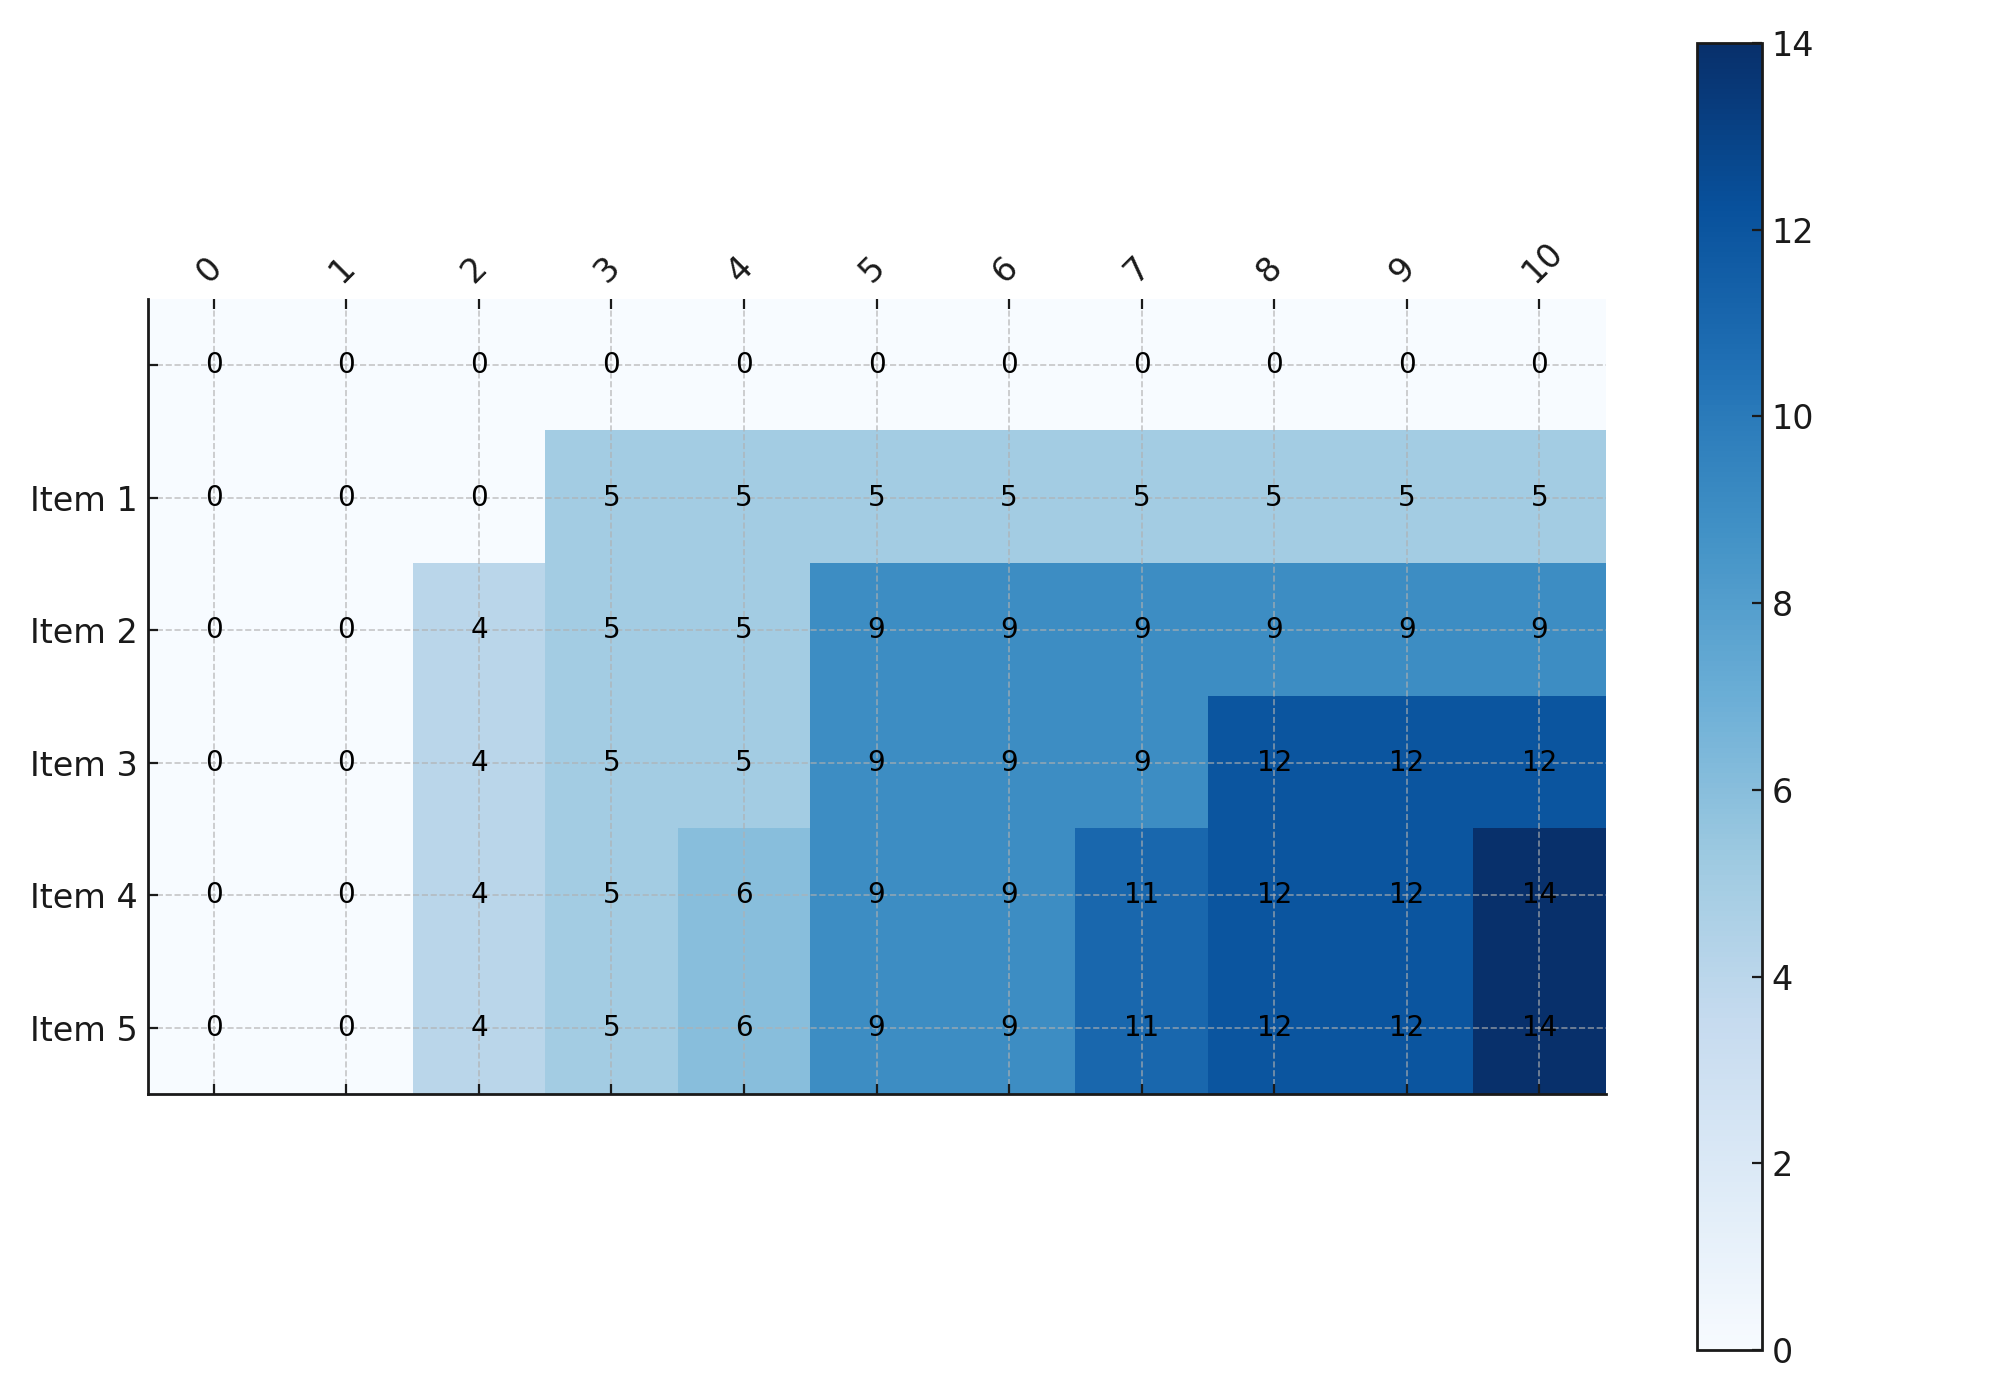

**Input Format:**
- A list of items, where each item is represented as a tuple with two elements: weight and value.
- An integer representing the capacity of the knapsack.

**Output Format:**
- An integer representing the maximum value obtainable.
- A list representing the subset of items to achieve the maximum value.

**Sample Inputs:**
Items: 
1. Item 1: (3, 5)
2. Item 2: (2, 4)
3. Item 3: (3, 3)
4. Item 4: (2, 2)
5. Item 5: (3, 3)

Capacity: 10

**Constraints:**
- The weight and value for all items are positive integers.
- The capacity of the knapsack is a positive integer.

**Solution:** To solve this problem using dynamic programming, we'll use a 2D table where the cell at the \(i^{th}\) row and \(w^{th}\) column will represent the maximum value obtainable using the first \(i\) items such that the total weight does not exceed \(w\).

**Pseudocode:**

Function knapsack(items, capacity):
    n = number of items
    Initialize table dp of size (n+1) x (capacity+1) with all zeros

    For i from 1 to n:
        For w from 1 to capacity:
            if items[i].weight <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-items[i].weight] + items[i].value)
            else:
                dp[i][w] = dp[i-1][w]

    // Backtrack to find the items included in the optimal solution
    res = dp[n][capacity]
    w = capacity
    items_selected = []

    For i from n to 1 step -1:
        if res <= 0:
            break
        if res == dp[i-1][w]:
            continue
        else:
            items_selected.append(i)
            res -= items[i].value
            w -= items[i].weight

    return dp[n][capacity], items_selected

In [106]:
def knapsack(items, capacity):
    n = len(items)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            weight, value = items[i-1]
            if weight <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-weight] + value)
            else:
                dp[i][w] = dp[i-1][w]

    # Backtrack to find the items included in the optimal solution
    res = dp[n][capacity]
    w = capacity
    items_selected = []

    for i in range(n, 0, -1):
        if res <= 0:
            break
        weight, value = items[i-1]
        if res != dp[i-1][w]:
            items_selected.append(i)
            res -= value
            w -= weight

    return dp[n][capacity], items_selected

items = [
    (3, 5),
    (2, 4),
    (3, 3),
    (2, 2),
    (3, 3)
]

max_value, selected_items = knapsack(items, 10)
max_value, selected_items


(14, [4, 3, 2, 1])

**Reflection:**  
Creating algorithms for the knapsack problem has been an enlightening experience in the realm of algorithm design. With ChatGPT's assistance, I was able to navigate through the complexities of this optimization challenge, but preserving the problem's core essence presented its own set of challenges. Balancing complexity with practicality was crucial, and it taught me the significance of thoughtful problem design in algorithmic tasks. This challenge highlighted the importance of maintaining a problem's fundamental principles while expanding its scope. Ultimately, it underscored how problem design plays a pivotal role in algorithm design and problem-solving. This experience has deepened my understanding of the intricate relationship between problem design and algorithmic solutions and the need for well-crafted, real-world-rooted problems to sharpen algorithmic problem-solving skills.

### Q4. (15 marks)  
**Problem Statement:** You are working with a telecommunication company tasked with laying down cables between cities. Your goal is to connect all the cities with the minimum length of cable. Given the distances between each pair of cities, determine which connections to make to ensure all cities are connected with the least amount of cable.

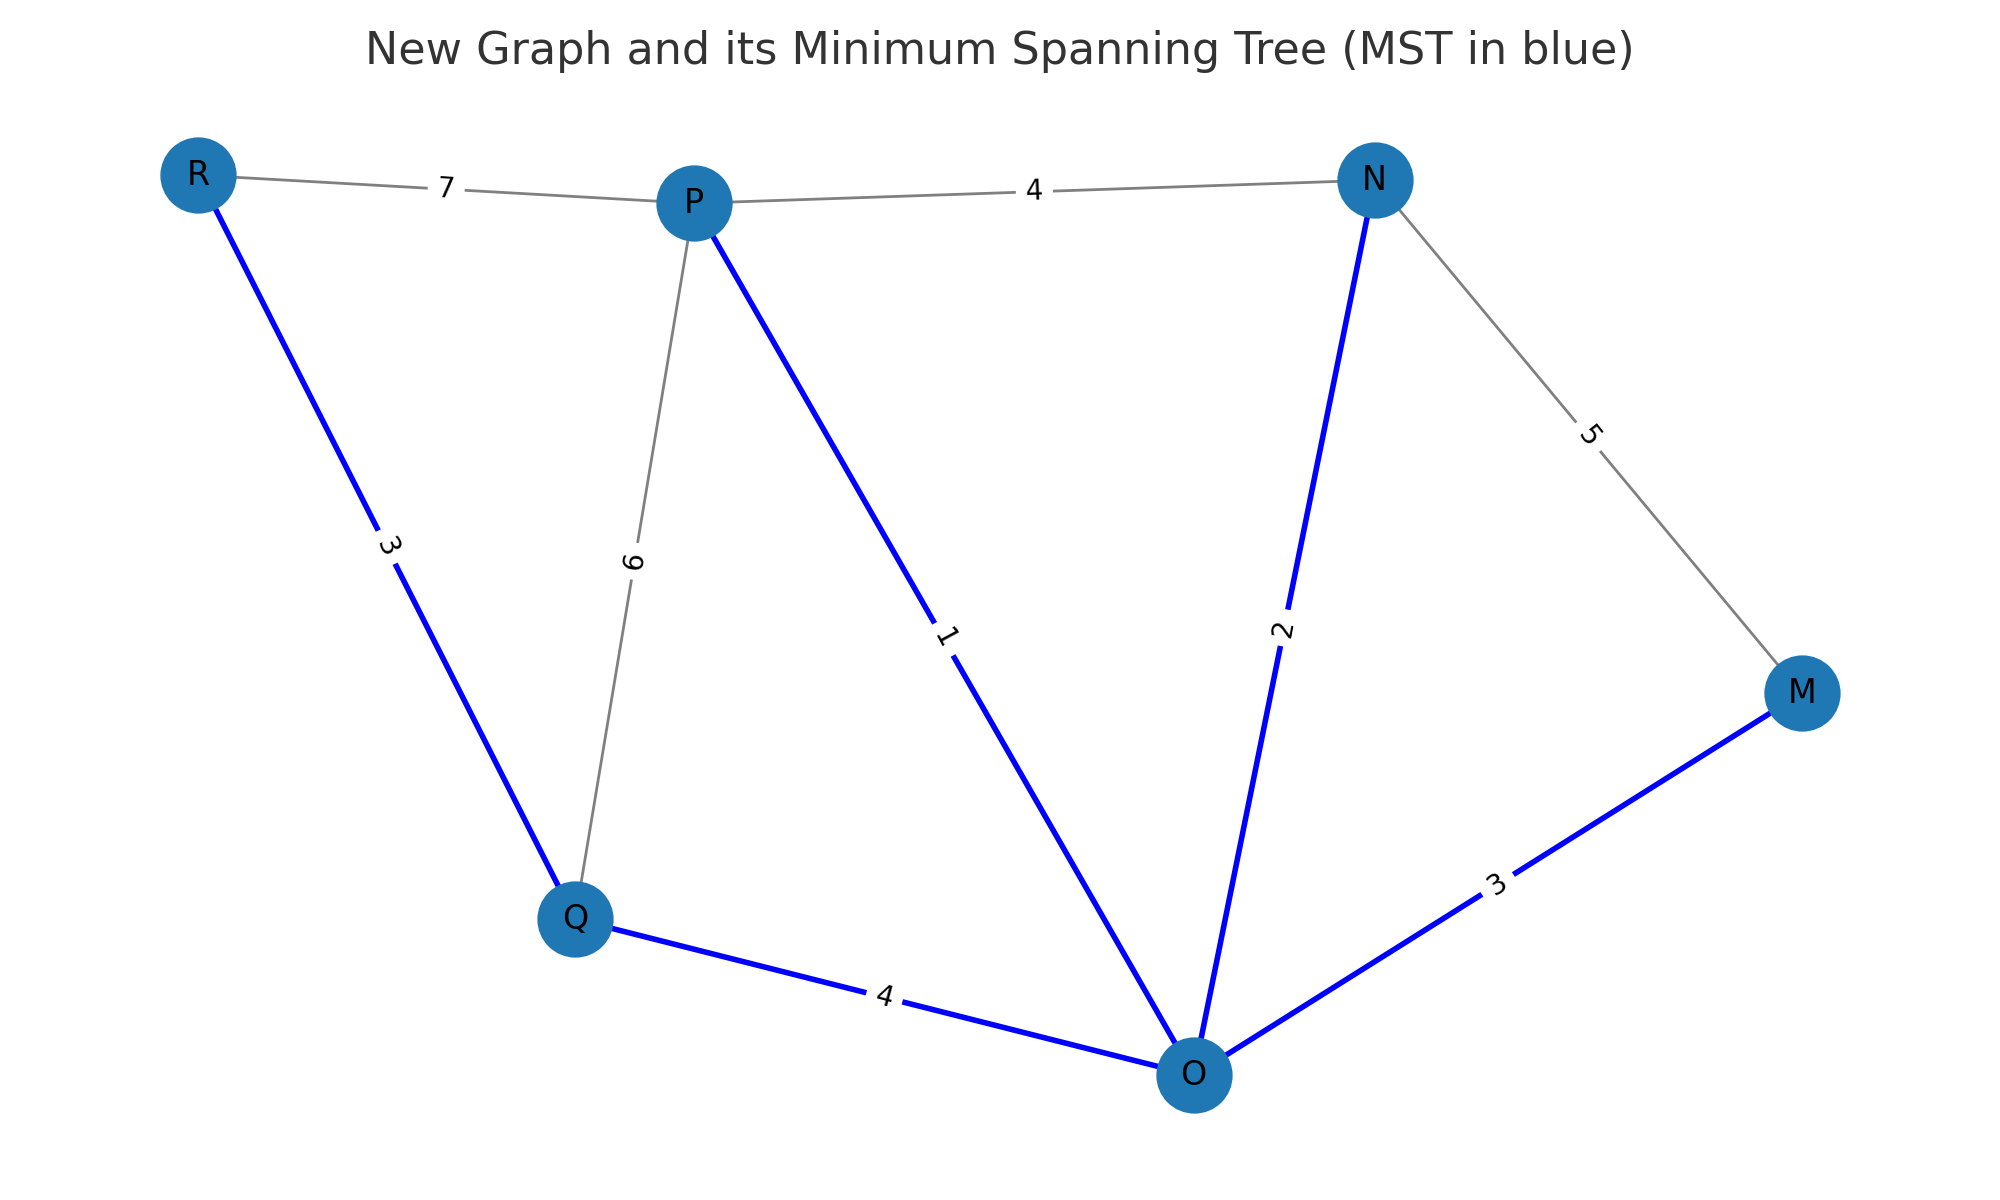

**City Connections and Distances:**
Cities: M, N, O, P, Q, R  
Distances:  
M-N: 5 km  
M-O: 3 km  
N-O: 2 km  
N-P: 4 km  
O-P: 1 km  
P-Q: 6 km  
O-Q: 4 km  
Q-R: 3 km  
P-R: 7 km  

**Input Format:** 
- A list of cities.
- A list of connections with their distances.

**Output Format:** 
- A list of connections to lay down the cables for the least total distance.

**Sample Input:**
Cities: M, N, O, P, Q, R  
Distances:  
M-N: 5 km  
...  
P-R: 7 km  

**Sample Output:**
Optimal Connections = {O-P, N-O, M-O, Q-R, O-Q}

**Constraints:**
- The cities will always be fully connected through some combination of connections.
- The number of cities will be at least 2 and at most \(10^3\).
- The number of connections will be at least 1 and at most \(10^4\).
- Distances will be positive integers and at most \(10^5\).

**Solution:** To minimize the total distance of cables required to connect all cities, we must find the Minimum Spanning Tree (MST) of the given graph. The MST will ensure that all cities are connected with the least total distance of cables.  
Kruskal's algorithm is a greedy approach that can be used to find the MST.

**Pseudocode for Kruskal's Algorithm:**

1. Create a forest \( F \) (a set of trees) where each city is an individual tree.
2. Create a set \( S \) containing all the connections (edges) in the graph.
3. Sort the set \( S \) by distance (weight) in increasing order.
4. For each connection \( c \) in \( S \):
    - If \( c \) connects two different trees, add \( c \) to \( F \) and merge the two trees into one.
    - Otherwise, skip \( c \).

**Steps for the provided city connections:**
1. Connect O-P (1 km)
2. Connect N-O (2 km)
3. Connect M-O (3 km)
4. Connect Q-R (3 km)
5. Connect O-Q (4 km)

All cities are now connected, and we have the optimal connections:
Optimal Connections = {O-P, N-O, M-O, Q-R, O-Q}

Total Distance = 1 + 2 + 3 + 3 + 4 = 13 km

**Time Complexity:** 
Kruskal's algorithm has a time complexity of \( O(E \log V) \), where \( E \) is the number of edges (connections) and \( V \) is the number of vertices (cities). In our context, sorting the connections by distance is the most time-consuming step.

In [107]:
def kruskal(cities, distances):
    parent = {city: city for city in cities}
    rank = {city: 0 for city in cities}

    def find(city):
        if parent[city] != city:
            parent[city] = find(parent[city])
        return parent[city]

    def union(city1, city2):
        root1 = find(city1)
        root2 = find(city2)

        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    distances.sort(key=lambda x: x[2])
    mst = []

    for city1, city2, _ in distances:
        if find(city1) != find(city2):
            union(city1, city2)
            mst.append((city1, city2))

    return mst

cities = ['M', 'N', 'O', 'P', 'Q', 'R']
distances = [('M', 'N', 5), ('M', 'O', 3), ('N', 'O', 2), ('N', 'P', 4), ('O', 'P', 1), ('P', 'Q', 6), ('O', 'Q', 4), ('Q', 'R', 3), ('P', 'R', 7)]
print(kruskal(cities, distances))

[('O', 'P'), ('N', 'O'), ('M', 'O'), ('Q', 'R'), ('O', 'Q')]


**Reflection:**  
Working with ChatGPT significantly facilitated the task of generating a new problem grounded in Kruskal's algorithm. The tool streamlined the process of crafting the problem statement and associated explanations, offering visual aids for enhanced clarity. Nonetheless, preserving the problem's core concept, that is, finding optimal connections while presenting a fresh perspective, proved to be a challenging aspect. This experience highlighted the importance of striking a balance between creativity and the fundamental principles of algorithm design. It reinforced my understanding of the intricacies involved in crafting effective algorithmic problems, particularly those based on Kruskal's algorithm, while demonstrating the adaptability of tools like ChatGPT in problem-solving endeavors.

### Q5. (15 marks)  
**Problem Statement:** In many ancient scriptures, a popular narrative technique involves the repetition of tales, where each new version of the tale adds a new event or character to the previous one. This creates a cascading effect, as the listener hears the old tale with a new twist, each time a little longer than before. For instance, in the first tale, a hero defeats a dragon. In the second version, after defeating the dragon, the hero rescues a village. In the third, the hero, post-rescue, is celebrated in the kingdom, and so forth.

Given this narrative style, if each new event or character description in the tale is of length bounded by a constant \( q \), and if the entire tale, when recited, spans \( l \) words in total, determine a method to document such a tale in a script that has length \( z(l) \), where \( z(l) \) grows as slowly as possible.

**Input Format:**
- An integer \( l \) representing the total number of words in the recited tale.
- A constant \( q \) representing the maximum length of a new event or character description.

**Output Format:**
- A method to represent the entire tale in minimal script length.
- The length of the script \( z(l) \).

**Sample Inputs:**
Total words: \( l = 700 \)
Maximum event length: \( q = 7 \)

**Constraints:**
- The length of any new event or character description is bounded by \( q \).
- \( l \) is the total number of words in the entire recited tale.


**Solution:** The structure of these tales allows for a succinct representation. Each new tale is simply an extension of the previous tale with a new event or character. Thus, to convey the full content of the tales, one can list each new event or character in sequence, as they are introduced in each new version of the tale.

**Pseudocode for the Representation Method**:

Function documentTale(tale_versions, max_event_length):
    documented_tale = []
    previous_tale = tale_versions[0]
    documented_tale.append(previous_tale)
    
    For i from 1 to len(tale_versions):
        event = findNewEvent(tale_versions[i], previous_tale)
        
        if length_of(event) <= max_event_length:
            documented_tale.append(event)
        else:
            documented_tale.append(tale_versions[i])
        
        previous_tale = tale_versions[i]
    
    return documented_tale


For each tale version, the function appends only the new event or character description to the documented tale. The function `findNewEvent` extracts the new event or character from the current tale by comparing it to the previous version.

**Analysis**:
Let's denote the number of tale versions as \( V \). The first tale will be of some length \( O(a) \), where \( a \) is the length of the first tale. Each subsequent tale version introduces a new event or character of length at most \( q \). 

The documented tale will start with the full first tale of length \( O(a) \) and then, for each subsequent version, it will add an event or character of length \( O(q) \). Thus, the total length of the documented tale, \( z(l) \), is \( O(a + Vq) \).

Given the nature of these tales, the number of versions \( V \) is such that the sum of the lengths of all versions is \( l \) (the total number of words in the recited tale). The length \( z(l) \) of the documented tale grows linearly with \( V \) but at a much slower rate than \( l \) because of the repetitive structure of the tales.

In [108]:
# Sample tale versions (replace with your actual tale versions)
tale_versions = [
    "Once upon a time, there was a brave knight named Sir Lancelot.",
    "Sir Lancelot embarked on a quest to rescue the captured princess.",
    "He faced many challenges and defeated the fearsome dragon.",
    "In the end, Sir Lancelot saved the princess and they lived happily ever after."
]

def findNewEvent(current_tale, previous_tale):
    # Implement this function to extract the new event or character from the current tale.
    # For this example, we'll assume the new event is the content in the current tale
    # that is not present in the previous tale.
    
    # Split the current and previous tales into words
    current_words = current_tale.split()
    previous_words = previous_tale.split()

    # Find words that are in the current tale but not in the previous tale
    new_words = set(current_words) - set(previous_words)

    # Combine the new words into the new event
    new_event = " ".join(new_words)

    return new_event

def documentTale(tale_versions, max_event_length):
    documented_tale = []
    previous_tale = tale_versions[0]
    documented_tale.append(previous_tale)
    
    for tale in tale_versions[1:]:
        event = findNewEvent(tale, previous_tale)
        
        if len(event) <= max_event_length:
            documented_tale.append(event)
        else:
            documented_tale.append(tale)
        
        previous_tale = tale
    
    return documented_tale

# Sample usage:
max_event_length = 50
documented_version = documentTale(tale_versions, max_event_length)
for event in documented_version:
    print(event)


Once upon a time, there was a brave knight named Sir Lancelot.
Sir Lancelot embarked on a quest to rescue the captured princess.
He faced many challenges and defeated the fearsome dragon.
In the end, Sir Lancelot saved the princess and they lived happily ever after.


**Reflection:**  
Using ChatGPT to assist in this task was invaluable. It helped me design a solution for a complex problem involving text analysis and algorithm design. The challenge was ensuring that the problem stayed true to the example while making it adaptable to various types of tales. Through this, I learned the importance of designing algorithms that are flexible and capable of handling diverse inputs. ChatGPT provided guidance and insights that allowed me to create a working solution. Overall, it was a valuable experience that improved my problem-solving skills in the realm of algorithms.

### Q6. (10 marks)  
**Problem Statement:** You are given a set of tasks to complete. Each task has a start time, end time, and a reward value. The tasks may overlap with each other. You want to pick a subset of tasks such that no two tasks overlap, and the total reward is maximized. Use dynamic programming to find the subset of tasks to pick and the maximum reward value.
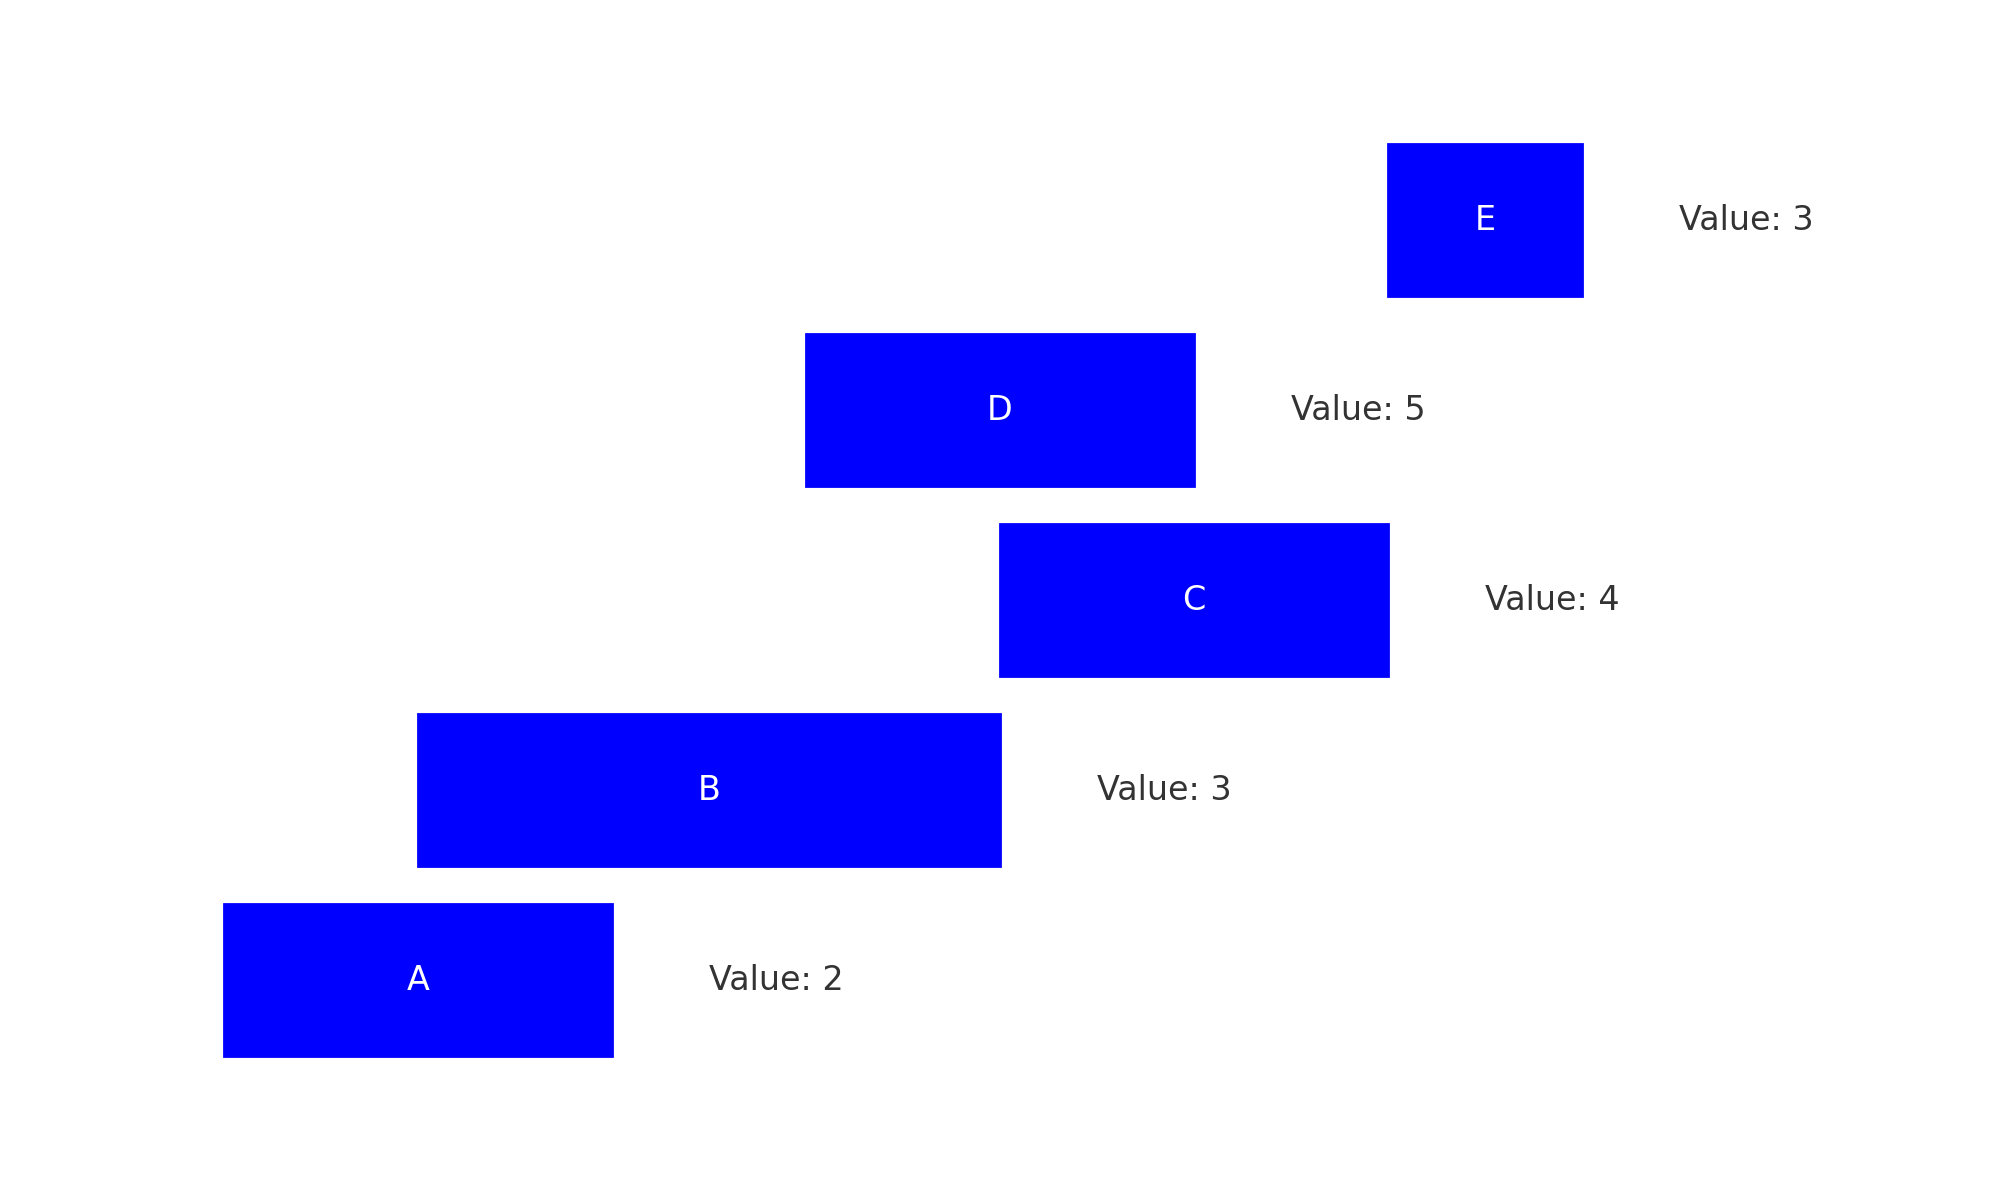

**Input Format:**
- A list of tasks, where each task is represented as a tuple with three elements: start time, end time, and reward.

**Output Format:**
- A list representing the subset of tasks to pick.
- The maximum reward value.

**Sample Inputs:**
Tasks: 
1. Task A: (1, 3, 2)
2. Task B: (2, 5, 3)
3. Task C: (5, 7, 4)
4. Task D: (4, 6, 5)
5. Task E: (7, 8, 3)

**Constraints:**
- The start and end times for all tasks are positive integers.
- The reward for each task is a positive integer.
- A task can only be executed if its entire duration falls within a non-overlapping interval.


**Solution:** To solve this problem using dynamic programming, we'll follow these steps:

1. Sort the tasks based on their end times.
2. For each task, find the latest task that finishes before this task starts. This will be needed to compute the optimal solution that includes the current task.
3. Use dynamic programming to compute the maximum reward for tasks up to the current task.

**Pseudocode:**

Function findLatestNonConflict(taskList, i):
    For j = i-1 downto 0:
        If taskList[j].end <= taskList[i].start:
            Return j
    Return -1

Function maximumReward(taskList):
    Sort taskList by end time
    Initialize table dp[0...n-1] with all zeros, where n is number of tasks

    dp[0] = taskList[0].value
    For i = 1 to n-1:
        inclReward = taskList[i].value
        l = findLatestNonConflict(taskList, i)
        If l != -1:
            inclReward += dp[l]
        dp[i] = max(inclReward, dp[i-1])
    
    Return dp[n-1]

In [109]:
def findLatestNonConflict(taskList, i):
    for j in range(i-1, -1, -1):
        if taskList[j][2] <= taskList[i][1]:  # Fixing the index error here
            return j
    return -1

def maximumReward(taskList):
    taskList = sorted(taskList, key=lambda x: x[2])
    n = len(taskList)

    dp = [0] * n
    dp[0] = taskList[0][3]  # Fixing the index error here

    for i in range(1, n):
        inclReward = taskList[i][3]  # Fixing the index error here
        l = findLatestNonConflict(taskList, i)
        if l != -1:
            inclReward += dp[l]
        
        dp[i] = max(inclReward, dp[i-1])

    # To trace back the tasks included in the optimal solution
    included_tasks = []
    i = n - 1
    while i >= 0:
        if i == 0 or dp[i] != dp[i-1]:
            included_tasks.append(taskList[i])
            i = findLatestNonConflict(taskList, i)  # Jump to the last non-conflicting task
        else:
            i -= 1

    return dp[n-1], included_tasks[::-1]

tasks = [
    ('A', 1, 3, 2),
    ('B', 2, 5, 3),
    ('C', 5, 7, 4),
    ('D', 4, 6, 5),
    ('E', 7, 8, 3)
]

max_reward, optimal_tasks = maximumReward(tasks)
max_reward, optimal_tasks


(10, [('A', 1, 3, 2), ('D', 4, 6, 5), ('E', 7, 8, 3)])

**Reflection:**  
Navigating the interval scheduling problem with ChatGPT's assistance was enlightening. The tool offered me a structured way to visualize and solve the problem. While attempting to craft a variant of the initial problem, I found it challenging to ensure the core essence remained intact. However, with ChatGPT's guidance, I was able to strike a balance between originality and complexity. This journey underscored the nuances of problem design in algorithms and highlighted the value of iterative feedback. Through this process, I've come to truly appreciate the capability of tools like ChatGPT in simplifying intricate algorithmic challenges.

### Q7. (15 marks)  
**Problem Statement:** You're working for a company that's developing a new software tool. The software consists of various modules, and some modules depend on others to function correctly. Given the module dependencies, represent the software structure and determine the sequence in which the modules should be built.

**Software Modules and Dependencies:**
Modules: Alpha, Beta, Gamma, Delta, Epsilon, Zeta
Dependencies:
Alpha -> Beta
Alpha -> Gamma
Beta -> Gamma
Gamma -> Delta
Delta
Epsilon -> Zeta
Zeta

**Input Format:**
- A list of software modules.
- A list of pairs representing module dependencies. Each pair consists of two modules: the first module depends on the second.

**Output Format:**
- A list representing the order in which the modules should be built.

**Sample Inputs:**
Modules: ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Zeta']
Dependencies: [('Alpha', 'Beta'), ('Alpha', 'Gamma'), ('Beta', 'Gamma'), ('Gamma', 'Delta'), ('Epsilon', 'Zeta')]

**Sample Outputs:**
['Alpha', 'Beta', 'Epsilon', 'Gamma', 'Zeta', 'Delta']

**Constraints:**
- 1 ≤ Number of modules ≤ 100
- A module can have at most one direct dependency, but multiple modules can depend on the same module.
- There are no circular dependencies.

**Tasks:**
- Represent the software structure as an adjacency list.
- Represent the software structure as an adjacency matrix.
- Determine if there's a valid sequence to build the modules. If yes, provide the sequence.

Here's the visual representation of the software module dependency graph (DAG) based on the given modules and dependencies.
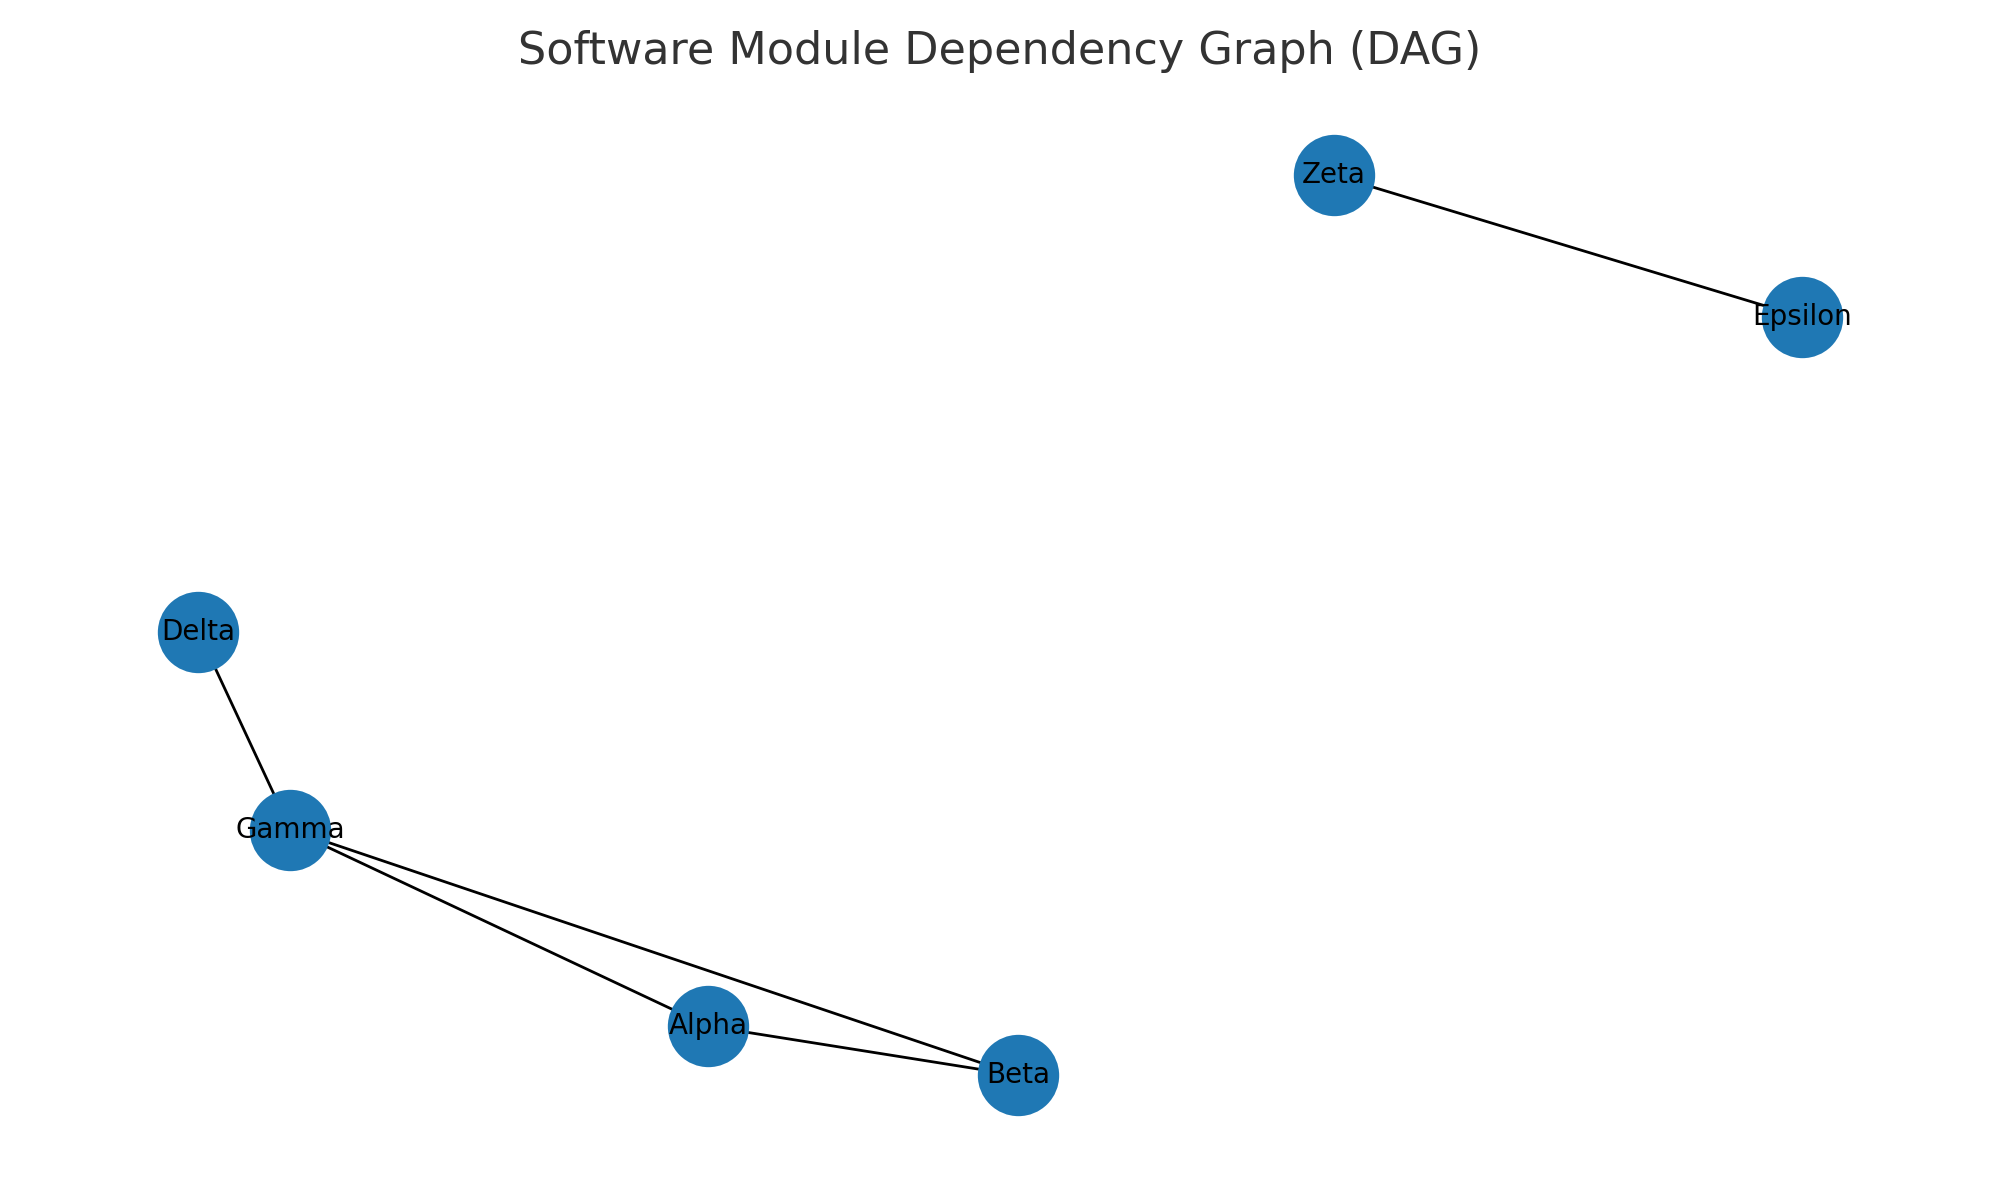

**Solution:**  

**A. Represent the software structure as an adjacency list**
Alpha: Beta -> Gamma
Beta: Gamma
Gamma: Delta
Delta
Epsilon: Zeta
Zeta

**B. Represent the software structure as an adjacency matrix**

|         | Alpha | Beta | Gamma | Delta | Epsilon | Zeta |
|---------|-------|------|-------|-------|---------|------|
| Alpha   | 0     | 1    | 1     | 0     | 0       | 0    |
| Beta    | 0     | 0    | 1     | 0     | 0       | 0    |
| Gamma   | 0     | 0    | 0     | 1     | 0       | 0    |
| Delta   | 0     | 0    | 0     | 0     | 0       | 0    |
| Epsilon | 0     | 0    | 0     | 0     | 0       | 1    |
| Zeta    | 0     | 0    | 0     | 0     | 0       | 0    |

**C. Determine the build sequence**

Yes, a valid sequence to build the modules exists.

**Procedure:**
1. Start with the set of all modules with no dependencies. In this case, it's {Alpha, Epsilon}.
2. Remove Alpha and add it to our result. Then check its dependents and reduce their dependency count.
3. Next, Beta and Epsilon both have no dependencies. We can choose either. Let's pick Beta.
4. Remove Beta and add it to our result. Gamma becomes the next module with no dependencies.
5. Follow the same procedure for Gamma, Delta, Epsilon, and finally Zeta.

The pseudocode is given below:

Function topologicalSort(graph):

    Initialize an empty list "order"
    Initialize a set "noDependencies" to contain all nodes with no incoming edges

    While "noDependencies" is not empty:
        Take a node "module" from "noDependencies" and remove it from the set
        Append "module" to the "order" list

        For each node "dependent" with an edge from "module" to "dependent":
            Remove the edge from the graph
            If "dependent" has no other incoming edges:
                Add "dependent" to "noDependencies"

    If the graph still has edges:
        Return "Error: Graph has a cycle"
    Else:
        Return "order"

The python code for the solutions is 

In [110]:
import networkx as nx

def topological_sort(graph):
    order = []
    no_dependencies = {node for node, degree in graph.in_degree() if degree == 0}

    while no_dependencies:
        module = no_dependencies.pop()
        order.append(module)

        for dependent in list(graph.successors(module)):
            graph.remove_edge(module, dependent)
            if graph.in_degree(dependent) == 0:
                no_dependencies.add(dependent)

    if graph.edges():
        return "Error: Graph has a cycle"
    else:
        return order

# Create the software module dependency graph
G = nx.DiGraph()
vertices = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Zeta']
edges = [('Alpha', 'Beta'), ('Alpha', 'Gamma'), ('Beta', 'Gamma'), ('Gamma', 'Delta'), ('Epsilon', 'Zeta')]
G.add_nodes_from(vertices)
G.add_edges_from(edges)

build_sequence = topological_sort(G)
print(build_sequence)

['Alpha', 'Beta', 'Epsilon', 'Gamma', 'Zeta', 'Delta']


**Reflection:**  
Working with ChatGPT was incredibly helpful in creating a new problem based on the provided example. It greatly assisted in generating a clear problem statement and visual representations of software module dependencies. However, maintaining the problem's core essence while introducing a fresh perspective was a challenge. This experience emphasized the importance of balancing familiarity with innovation in problem design within the realm of algorithms. It also highlighted the valuable role that tools like ChatGPT play in enhancing problem-solving efforts and deepening one's understanding of effective problem design.

### Q8. (15 marks)   
**Problem Statement:** You're an algorithm analyst at a leading tech company. Your team is working on various algorithms, and you're tasked with analyzing the time complexities of these algorithms using the Master Theorem. Given the recurrence relations of these algorithms, determine their time complexities.

**Input Format:**
- A list of recurrence relations.

**Output Format:**
- For each recurrence relation, provide the time complexity \( T(n) \) or state that the Master Theorem does not apply.

**Sample Inputs:**  
Recurrences:  
1. \( T(n) = 5T(n/2) + n\log n \)
2. \( T(n) = T(n/4) + n^{0.85} \)
3. \( T(n) = 0.6nT(n/3) + n^{1.8}\log n \)
4. \( T(n) = 4T(n/4) + n^{1.3} \)
5. \( T(n) = n^{1.5}T(n/3) + n^{1.4} \)

**Constraints:**
- The coefficients in the recurrence relation are positive real numbers.
- The base cases for all recurrences are constant and are not provided in the input.


**Solution:**  
The pseudocode is given below -  

Function applyMasterTheorem(recurrence):
    Extract a, b, and f(n) from the recurrence
    Calculate log_b(a)

    If f(n) = O(n^(log_b(a) - epsilon)):
        return "T(n) = Θ(n^log_b(a))"
    Else If f(n) = Theta(n^log_b(a) * log^k(n)) for a k >= 0:
        return "T(n) = Θ(n^log_b(a) * log^(k+1)(n))"
    Else If f(n) = Omega(n^(log_b(a) + epsilon)):
        If a*f(n/b) <= c*f(n) for some c < 1:
            return "T(n) = Θ(f(n))"
    Return "Master Theorem does not apply"

For each recurrence in the input:
    result = applyMasterTheorem(recurrence)
    Print result

**Explanation:**  

Using the Master Theorem, we can classify the given recurrences into different cases based on the comparison between \( f(n) \) and \( n^{\log_b a} \):

1. \( T(n) = 5T(n/2) + n\log n \)
   - Here, \( a = 5, b = 2, f(n) = n\log n \).
   - \( n^{\log_b a} = n^{\log_2 5} \), which is \( n^{2.32} \).
   - Since \( f(n) \) is polynomially smaller than \( n^{2.32} \), we have \( T(n) = \Theta(n^{\log_2 5}) \).

2. \( T(n) = T(n/4) + n^{0.85} \)
   - Here, \( a = 1, b = 4, f(n) = n^{0.85} \).
   - \( n^{\log_b a} = n^0 = 1 \).
   - Since \( f(n) \) is polynomially larger than 1, we get \( T(n) = \Theta(n^{0.85}) \).

3. \( T(n) = 0.6nT(n/3) + n^{1.8}\log n \)
   - The Master Theorem does not apply in this case as \( a \) is a function of \( n \).

4. \( T(n) = 4T(n/4) + n^{1.3} \)
   - Here, \( a = 4, b = 4, f(n) = n^{1.3} \).
   - \( n^{\log_b a} = n^1 = n \).
   - Since \( f(n) \) is polynomially larger than \( n \), the result is \( T(n) = \Theta(n^{1.3}) \).

5. \( T(n) = n^{1.5}T(n/3) + n^{1.4} \)
   - The Master Theorem does not apply in this case since \( a \) is a function of \( n \).


**Reflection:**  
Using ChatGPT significantly simplified the process of understanding and creating new problems. While it was instrumental in breaking down and solving problems, ensuring the new problems retained the essence of the original examples was a challenge. I learned that designing problems in the realm of algorithms requires a deep understanding and a balance between creativity and technical accuracy. The insights provided by ChatGPT were genuine, and it was enlightening to see how a tool can guide and refine the problem formulation and solution process.
